# Intensity projections
clEsperanto brings some intensity projections which are also available with numpy. Let's see how numpy performs in comparison with our OpenCL stuff. When doing similar comparisons with ImageJ, we saw more performance benefits when GPU-accelerating 3D operations compared to 2D operations. https://clij.github.io/clij-benchmarking/benchmarking_operations_jmh

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import pyclesperanto_prototype as cle
import pyclesperanto as pcle
import numpy as np
import time

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('RTX')

<NVIDIA GeForce RTX 4090 on Platform: NVIDIA CUDA (1 refs)>

In [2]:
pcle.set_wait_for_kernel_finish(True)
pcle.select_device('RTX')

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.183.06
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24183 MB
	Maximum Object Size:         6045 MB
	Max Clock Frequency:         2520 MHz
	Image Support:               Yes

(120, 160, 160)


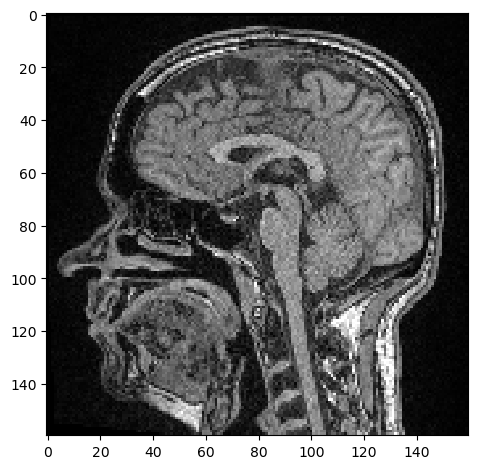

In [3]:
# test data
from skimage.io import imread, imshow

raw_image = imread('data/Haase_MRT_tfl3d1.tif')

print(raw_image.shape)

# our test data is 3D but we show just a slice for visualisation purposes
imshow(raw_image[60])

## Maximum intensity projection in Z

clEsperanto maximum_intensity projection(Z) duration: 0.00438380241394043
clEsperanto maximum_intensity projection(Z) duration: 0.00021505355834960938
clEsperanto maximum_intensity projection(Z) duration: 0.00012993812561035156
clEsperanto maximum_intensity projection(Z) duration: 0.00012254714965820312
clEsperanto maximum_intensity projection(Z) duration: 0.00011372566223144531
clEsperanto maximum_intensity projection(Z) duration: 0.00011157989501953125
clEsperanto maximum_intensity projection(Z) duration: 0.00011014938354492188
clEsperanto maximum_intensity projection(Z) duration: 0.00010848045349121094
clEsperanto maximum_intensity projection(Z) duration: 0.00010704994201660156
clEsperanto maximum_intensity projection(Z) duration: 0.00010514259338378906


/home/strigaud/Libraries/miniforge3/envs/skbuild2/lib/python3.12/site-packages/pyclesperanto_prototype/_tier9/_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


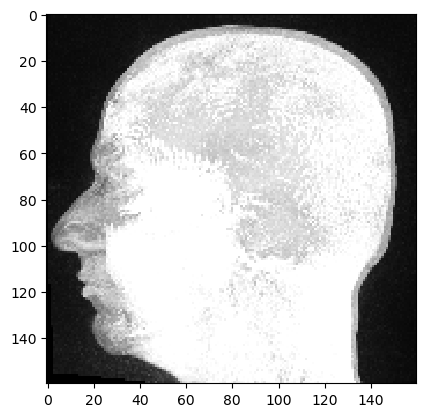

In [4]:
# maximum projection with clesperanto
result_image = None

test_image = cle.push(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.maximum_z_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(Z) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

clEsperanto maximum_intensity projection(Z) duration: 0.0005316734313964844
clEsperanto maximum_intensity projection(Z) duration: 0.00039315223693847656
clEsperanto maximum_intensity projection(Z) duration: 0.00040435791015625
clEsperanto maximum_intensity projection(Z) duration: 0.00019550323486328125
clEsperanto maximum_intensity projection(Z) duration: 0.00021767616271972656
clEsperanto maximum_intensity projection(Z) duration: 0.00019097328186035156
clEsperanto maximum_intensity projection(Z) duration: 0.00018978118896484375
clEsperanto maximum_intensity projection(Z) duration: 0.00018739700317382812
clEsperanto maximum_intensity projection(Z) duration: 0.000186920166015625
clEsperanto maximum_intensity projection(Z) duration: 0.00019168853759765625


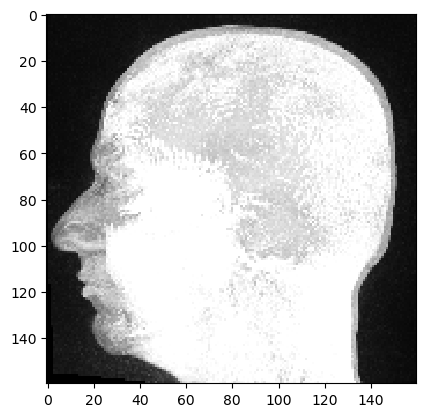

In [5]:
# maximum projection with clesperanto
result_image = None

test_image = pcle.push(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = pcle.maximum_z_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(Z) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

Numpy maximum_intensity projection(Z) duration: 0.0003228187561035156
Numpy maximum_intensity projection(Z) duration: 0.0003223419189453125
Numpy maximum_intensity projection(Z) duration: 0.00016999244689941406
Numpy maximum_intensity projection(Z) duration: 0.0001201629638671875
Numpy maximum_intensity projection(Z) duration: 0.00011849403381347656
Numpy maximum_intensity projection(Z) duration: 0.00011944770812988281
Numpy maximum_intensity projection(Z) duration: 0.00011920928955078125
Numpy maximum_intensity projection(Z) duration: 0.00011992454528808594
Numpy maximum_intensity projection(Z) duration: 0.00012302398681640625
Numpy maximum_intensity projection(Z) duration: 0.00012159347534179688


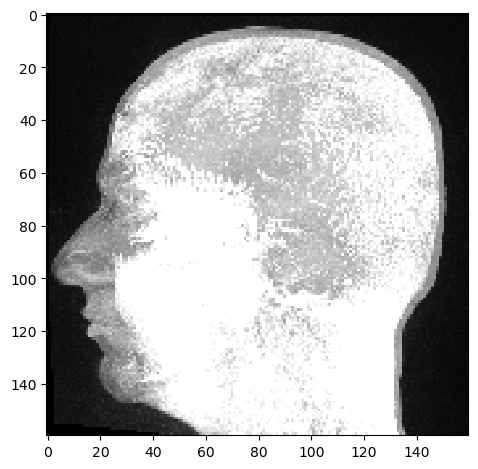

In [6]:
# maximum projection with numpy
result_image = None

test_image = np.asarray(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = np.max(test_image, axis=0, out=result_image)
    print("Numpy maximum_intensity projection(Z) duration: " + str(time.time() - start_time))
    
imshow(result_image)

## Maximum intensity projection in X

clEsperanto maximum_intensity projection(X) duration: 0.001936197280883789
clEsperanto maximum_intensity projection(X) duration: 0.00024199485778808594
clEsperanto maximum_intensity projection(X) duration: 0.0001423358917236328
clEsperanto maximum_intensity projection(X) duration: 0.0001304149627685547
clEsperanto maximum_intensity projection(X) duration: 0.000125885009765625
clEsperanto maximum_intensity projection(X) duration: 0.00012302398681640625
clEsperanto maximum_intensity projection(X) duration: 0.0001201629638671875
clEsperanto maximum_intensity projection(X) duration: 0.00011920928955078125
clEsperanto maximum_intensity projection(X) duration: 0.00011754035949707031
clEsperanto maximum_intensity projection(X) duration: 0.00011754035949707031


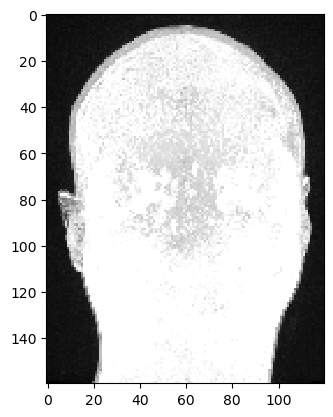

In [7]:
# maximum projection with clesperanto
result_image = None

test_image = cle.push(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.maximum_x_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(X) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

clEsperanto maximum_intensity projection(X) duration: 0.0005049705505371094
clEsperanto maximum_intensity projection(X) duration: 0.0002086162567138672
clEsperanto maximum_intensity projection(X) duration: 0.00020074844360351562
clEsperanto maximum_intensity projection(X) duration: 0.00020265579223632812
clEsperanto maximum_intensity projection(X) duration: 0.00020885467529296875
clEsperanto maximum_intensity projection(X) duration: 0.00019073486328125
clEsperanto maximum_intensity projection(X) duration: 0.00018548965454101562
clEsperanto maximum_intensity projection(X) duration: 0.0001857280731201172
clEsperanto maximum_intensity projection(X) duration: 0.00018644332885742188
clEsperanto maximum_intensity projection(X) duration: 0.00018405914306640625


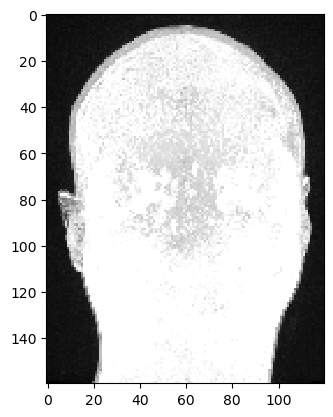

In [8]:
# maximum projection with clesperanto
result_image = None

test_image = pcle.push(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = pcle.maximum_x_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(X) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

Numpy maximum_intensity projection(X) duration: 0.0006473064422607422
Numpy maximum_intensity projection(X) duration: 0.0005524158477783203
Numpy maximum_intensity projection(X) duration: 0.0005269050598144531
Numpy maximum_intensity projection(X) duration: 0.000522613525390625
Numpy maximum_intensity projection(X) duration: 0.0005199909210205078
Numpy maximum_intensity projection(X) duration: 0.0005192756652832031
Numpy maximum_intensity projection(X) duration: 0.0005230903625488281
Numpy maximum_intensity projection(X) duration: 0.0005178451538085938
Numpy maximum_intensity projection(X) duration: 0.0005190372467041016
Numpy maximum_intensity projection(X) duration: 0.0005297660827636719


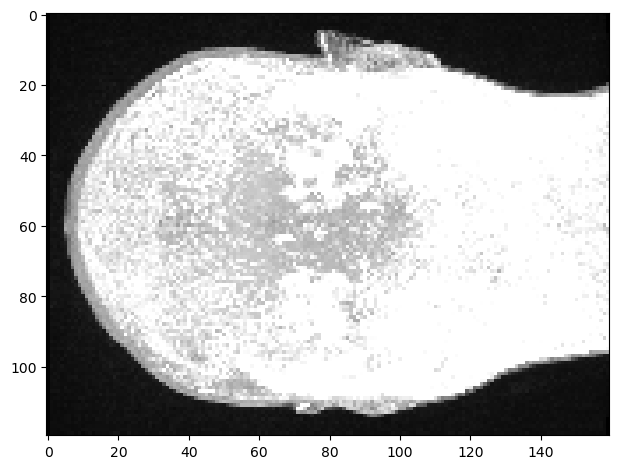

In [9]:
# maximum projection with numpy
result_image = None

test_image = np.asarray(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = np.max(test_image, axis=2, out=result_image)
    print("Numpy maximum_intensity projection(X) duration: " + str(time.time() - start_time))
    
imshow(result_image)